## Representação

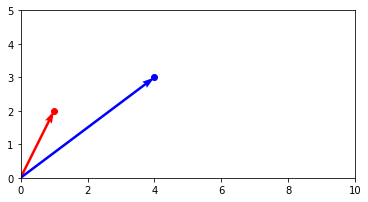

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Definindo pois pontos (vetores)
# Lembrando que os valores representam as componentes
p = np.array([1, 2])
q = np.array([4, 3])

# Origem
origin = np.array([0, 0])

# Plotando os pontos e a representação vetorial
plt.figure()
plt.plot(p[0], p[1], 'ro')
plt.quiver(*origin, *p, color='r', angles='xy', scale_units='xy', scale=1)

plt.plot(q[0], q[1], 'bo')
plt.quiver(*origin, *q, color='b', angles='xy', scale_units='xy', scale=1)

plt.axis('scaled')
plt.axis((0, 10, 0, 5))
plt.show()


## Direção

[3 1]
3.1622776601683795
0.3217505543966422
[0.9486833  0.31622777]


(0.0, 5.0, 0.0, 5.0)

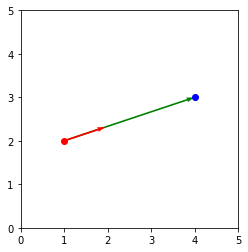

In [ ]:
v = q - p
print(v)

# Norma (magnitude)
m = np.linalg.norm(v)
print(m)

# Orientação
a = np.arctan2(v[1], v[0])
print(a)

# Vetor unitário (direção)
u = v / m
print(u)


plt.figure()
plt.plot(p[0], p[1], 'ro')
plt.plot(q[0], q[1], 'bo')

# Plotando o vetor deslocamento
plt.quiver(*p, *v, color='g', angles='xy', scale_units='xy', scale=1)

# Plotando o vetor direção
plt.quiver(*p, *u, color='r', angles='xy', scale_units='xy', scale=1)

plt.axis('scaled')
plt.axis((0, 5, 0, 5))


## Referencial

axes =  [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
x_axis =  [0.70710678 0.70710678]
y_axis =  [-0.70710678  0.70710678]
axes =  [[ 1. -0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
x_axis =  [1. 0.]
y_axis =  [-0.  1.]


(0.0, 5.0, 0.0, 5.0)

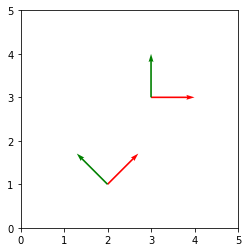

In [ ]:
# Matriz de rotação em relação a Z
def Rz(theta):
    return np.array([[ np.cos(theta), -np.sin(theta), 0 ],
                      [ np.sin(theta), np.cos(theta) , 0 ],
                      [ 0            , 0             , 1 ]])



# Plota um referencial no plano
def plot_frame(Porg, R, c=None):
    
    axis_size = 1.0    
    axes = axis_size*R

    print("axes = ", axes)
    
  
    x_axis = np.array(axes[0:2,0])
    y_axis = np.array(axes[0:2,1])

    print("x_axis = ", x_axis)
    print("y_axis = ", y_axis)

    if c == None:
        c = ['r', 'g']
    
    # X
    plt.quiver(*Porg[0:2], *x_axis, color=c[0], angles='xy', scale_units='xy', scale=1)
    
    # Y
    plt.quiver(*Porg[0:2], *y_axis, color=c[1], angles='xy', scale_units='xy', scale=1)
    
 
plt.figure()

# Frame A
Porg = np.array([2, 1, 0])    
R = Rz(np.deg2rad(45))
plot_frame(Porg, R)

# Frame B
Porg = np.array([3, 3, 0])    
R = Rz(np.deg2rad(0))
plot_frame(Porg, R)

plt.axis('scaled')
plt.axis((0, 5, 0, 5))

# Mapeamento

## Translação


In [ ]:
# ponto do objeto p na coordenada b
pb = np.array([4, 3, 5])

#origem da coordenada "b" em relação a "a"
pa_borg = np.array([7, 2, 0])

#ponto do objeto "p" em realacao a "a"
pa = pb + pa_borg # como só temos transalaçao, basta fazer a soma da origem com o ponto p em relacao a b
print(pa)


[11  5  5]


## Rotação

In [ ]:
# sistema sobrepondo o eixo A, apenas com uma rotação

pb = np.array([0, 2, 0])

# rotacao de 30 graus
theta = np.deg2rad(30)

# Qual operador de multiplicação utilizar?
# https://blog.finxter.com/numpy-matmul-operator/

pa = Rz(theta).dot(pb)
print(pa)

pa = np.matmul(Rz(theta), pb)
print(pa)

# multiplicacao mais compacta quando
# houver mais multiplicacoes

# Temos a matriz de relação B em A
pa = Rz(theta) @ pb

#pa é o objeto p no sistema A
print(pa)

[-1.          1.73205081  0.        ]
[-1.          1.73205081  0.        ]
[-1.          1.73205081  0.        ]


Ângulos de Euler:

In [ ]:
def Rx(theta):
 
    return np.array([[  1, 0            , 0           ],
                      [ 0, np.cos(theta),-np.sin(theta)],
                      [ 0, np.sin(theta), np.cos(theta)]])
  
def Ry(theta):
 
    return np.array([[  np.cos(theta), 0, np.sin(theta)],
                      [ 0            , 1, 0           ],
                      [-np.sin(theta), 0, np.cos(theta)]])


alpha = np.pi/2
beta = np.pi/4
gamma = np.pi/3

R = Rz(alpha) @ Ry(beta) @ Rx(gamma)
print(R)

cB = np.sqrt(R[0,0]**2 + R[1,0]**2)

# Obtendo os Euler Angles a partir da matriz
beta_calc = np.arctan2(-R[2,0], cB)
alpha_calc = np.arctan2(R[1,0]/cB, R[0,0]/cB)
gamma_calc = np.arctan2(R[2,1]/cB, R[2,2]/cB)

# Achamos os angulos novamente, ou seja, conseguimos retornar os angulos de rotacao
# dos sistemas de coordenadas(aonde determindado objeto aponta, por exemplo)
print(alpha, alpha_calc)
print(beta, beta_calc)
print(gamma, gamma_calc)

[[ 4.32978028e-17 -5.00000000e-01  8.66025404e-01]
 [ 7.07106781e-01  6.12372436e-01  3.53553391e-01]
 [-7.07106781e-01  6.12372436e-01  3.53553391e-01]]
1.5707963267948966 1.5707963267948966
0.7853981633974483 0.7853981633974483
1.0471975511965976 1.0471975511965976


#Translação + Rotação

[ 9.09807621 12.56217783  0.        ]
axes =  [[ 1. -0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
x_axis =  [1. 0.]
y_axis =  [-0.  1.]
axes =  [[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]
x_axis =  [0.8660254 0.5      ]
y_axis =  [-0.5        0.8660254]


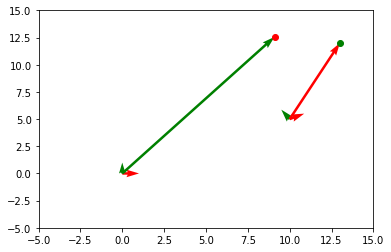

In [54]:
# Objeto p em relacao a B
pb = np.array([3, 7, 0])

# Origem de B
pa_borg = np.array([10, 5, 0])

# Grau de rotacao
theta = np.deg2rad(30)

# Tranformações rígidas
pa = Rz(theta) @ pb + pa_borg

# p em relacao a A
print(pa)


# DESENHANDO
plt.figure()

plt.plot(pa[0], pa[1], 'ro')
pb_em_b = pb + pa_borg
plt.plot(pb_em_b[0], pb_em_b[1], 'go')

# Frame A
a_origin = np.array([0, 0, 0])
Porg = np.array(a_origin)    
R = Rz(np.deg2rad(0))
plot_frame(Porg, R)

# Frame B
Porg = pa_borg     
R = Rz(theta)
plot_frame(Porg, R)

# plt.axis('scaled')
plt.axis((-5, 15, -5, 15))

# p em relacao a b 
plt.quiver(*pa_borg[0:2], *pb[0:2], color='r', angles='xy', scale_units='xy', scale=1)

# p em relacao a a 
plt.quiver(*a_origin[0:2], *pa[0:2], color='g', angles='xy', scale_units='xy', scale=1)
